In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.jaywalk_gym.jaywalk_env import JaywalkEnv, EnvParams
from src.agents.ppo.ppo_agent import PPOAgent

In [2]:
easy_params = EnvParams(
    use_traffic_light=True,
    max_reward=100,
    wait_reward=-1,
    death_reward=-50,
)
easy_env = JaywalkEnv(easy_params)

In [3]:
medium_params = EnvParams(
    use_traffic_light=True,
    max_reward=100,
    wait_reward=-1,
    death_reward=-50,
    num_lane_groups=3,
    max_vehicles=30,
    p_vehicle_spawn=0.8,
    p_vehicle_stop=0.5,
)
medium_env = JaywalkEnv(medium_params)

In [3]:
hard_params = EnvParams(
    use_traffic_light=True,
    max_reward=100,
    wait_reward=-1,
    death_reward=-50,
    num_lane_groups=4,
    max_vehicles=50,
    p_vehicle_spawn=0.9,
    p_vehicle_stop=0.3,
)
hard_env = JaywalkEnv(hard_params)

In [ ]:
import torch
import numpy as np
import pickle

torch.manual_seed(101)
np.random.seed(101)

env_type = "hard"
env = hard_env
train_parameters = {
    "state_dim": env.grid_shape[0] * env.grid_shape[1] + 3,
    "action_dim": 3,
    "action_space": [0, 1, 2],
    "num_layers": 3,
    "hidden_dim": 64,
    "gamma": 0.99,
    "total_training_time_step": 1_000_000,
    "batch_size": 64,
    "learning_rate": 3e-5,
    "device": "cpu",
    "clip": 0.4,
    "epochs_per_iteration": 64,
    "timeout": 200,
}

agent = PPOAgent(env, train_parameters)
result = agent.train(train_parameters["total_training_time_step"])

filename = (
        f"./checkpoints/final_dqn/trial_{env_type}"
    )
agent.save(filename)

with open(f"./checkpoints/final_dqn/trial_{env_type}_training_results.pkl", "wb") as f:
    pickle.dump(result, f)

Training Progress: 100%|██████████| 15625/15625 [12:35<00:00, 20.67it/s]


In [20]:
all_training_results = []

# for env_type in ["easy", "medium", "hard"]:
with open(f"./checkpoints/final_dqn/trial_hard_training_results.pkl", "rb") as f:
    all_training_results.append(pickle.load(f))
    

(1000000,)


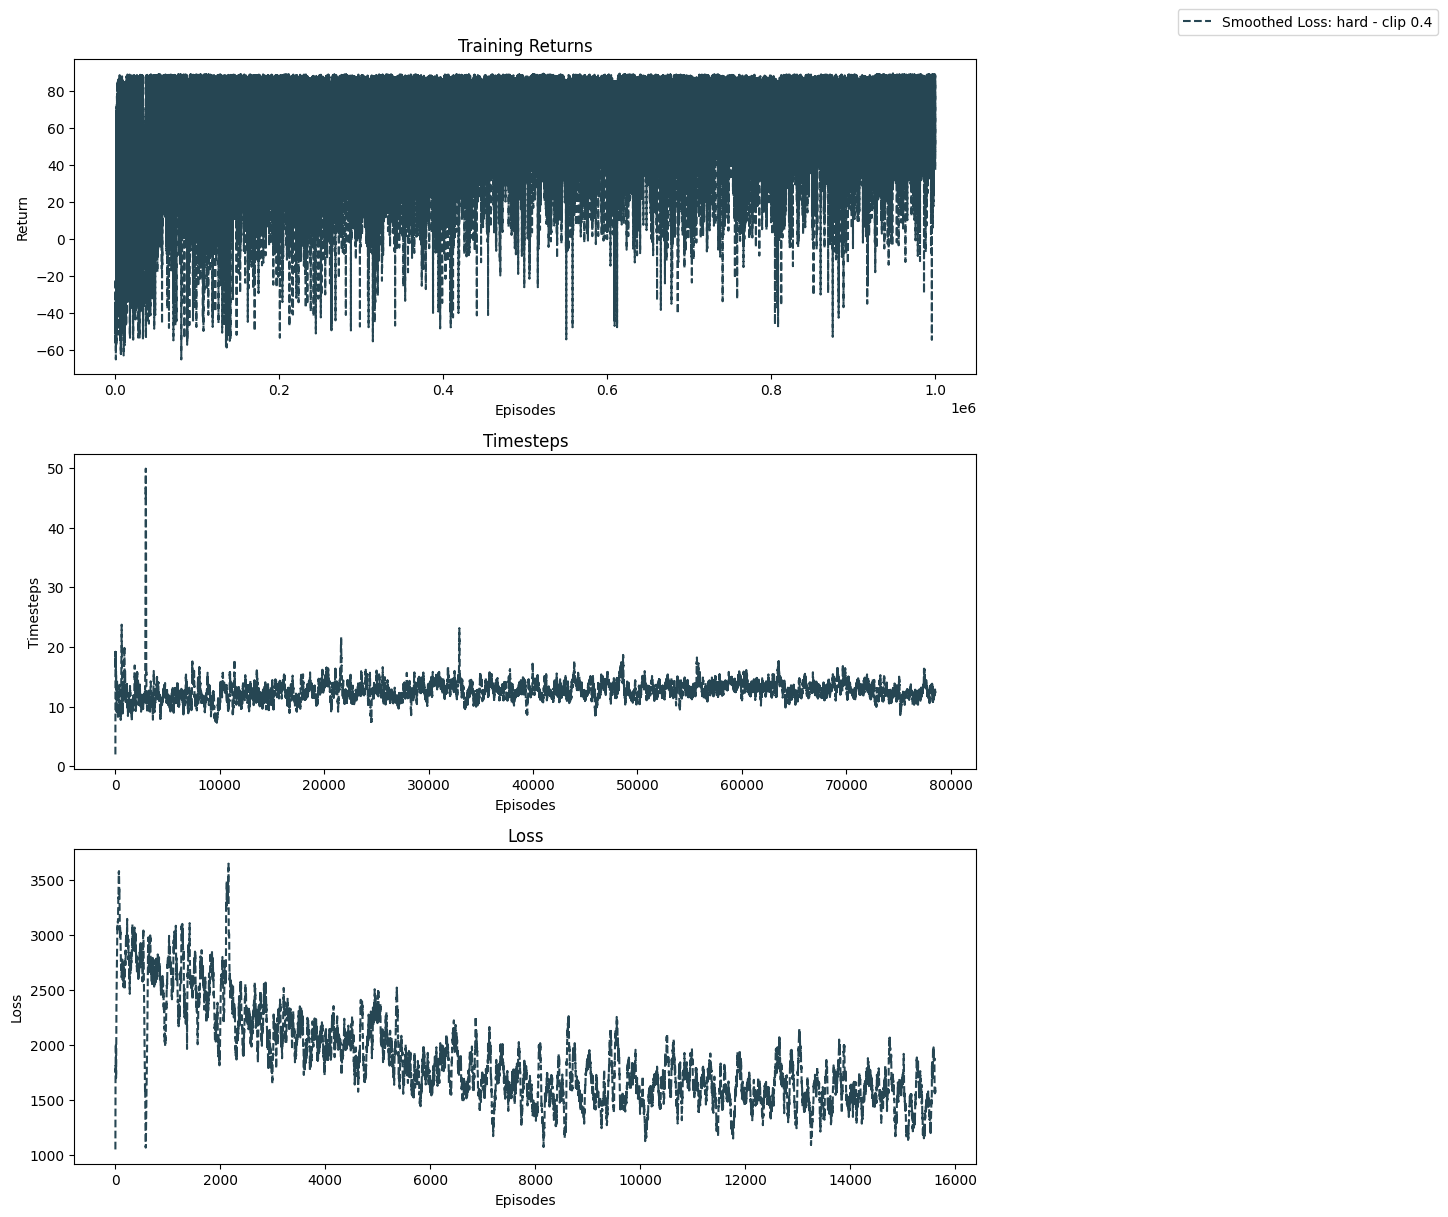

In [23]:
agent.plot_multiple_training_result(all_training_results, ["hard - clip 0.4"])

In [17]:
import pickle
all_training_results = []

for env_type in ["hard", "medium", "easy"]:
    with open(f"./checkpoints/final_ppo_fixed/{env_type}_training_results.pkl", "rb") as f:
        all_training_results.append(pickle.load(f))

# # for env_type in ["easy", "medium", "hard"]:
# with open(f"./checkpoints/final_dqn/trial_hard_training_results.pkl", "rb") as f:
#     all_training_results.append(pickle.load(f))

(1000000,)
(1000000,)
(1000000,)


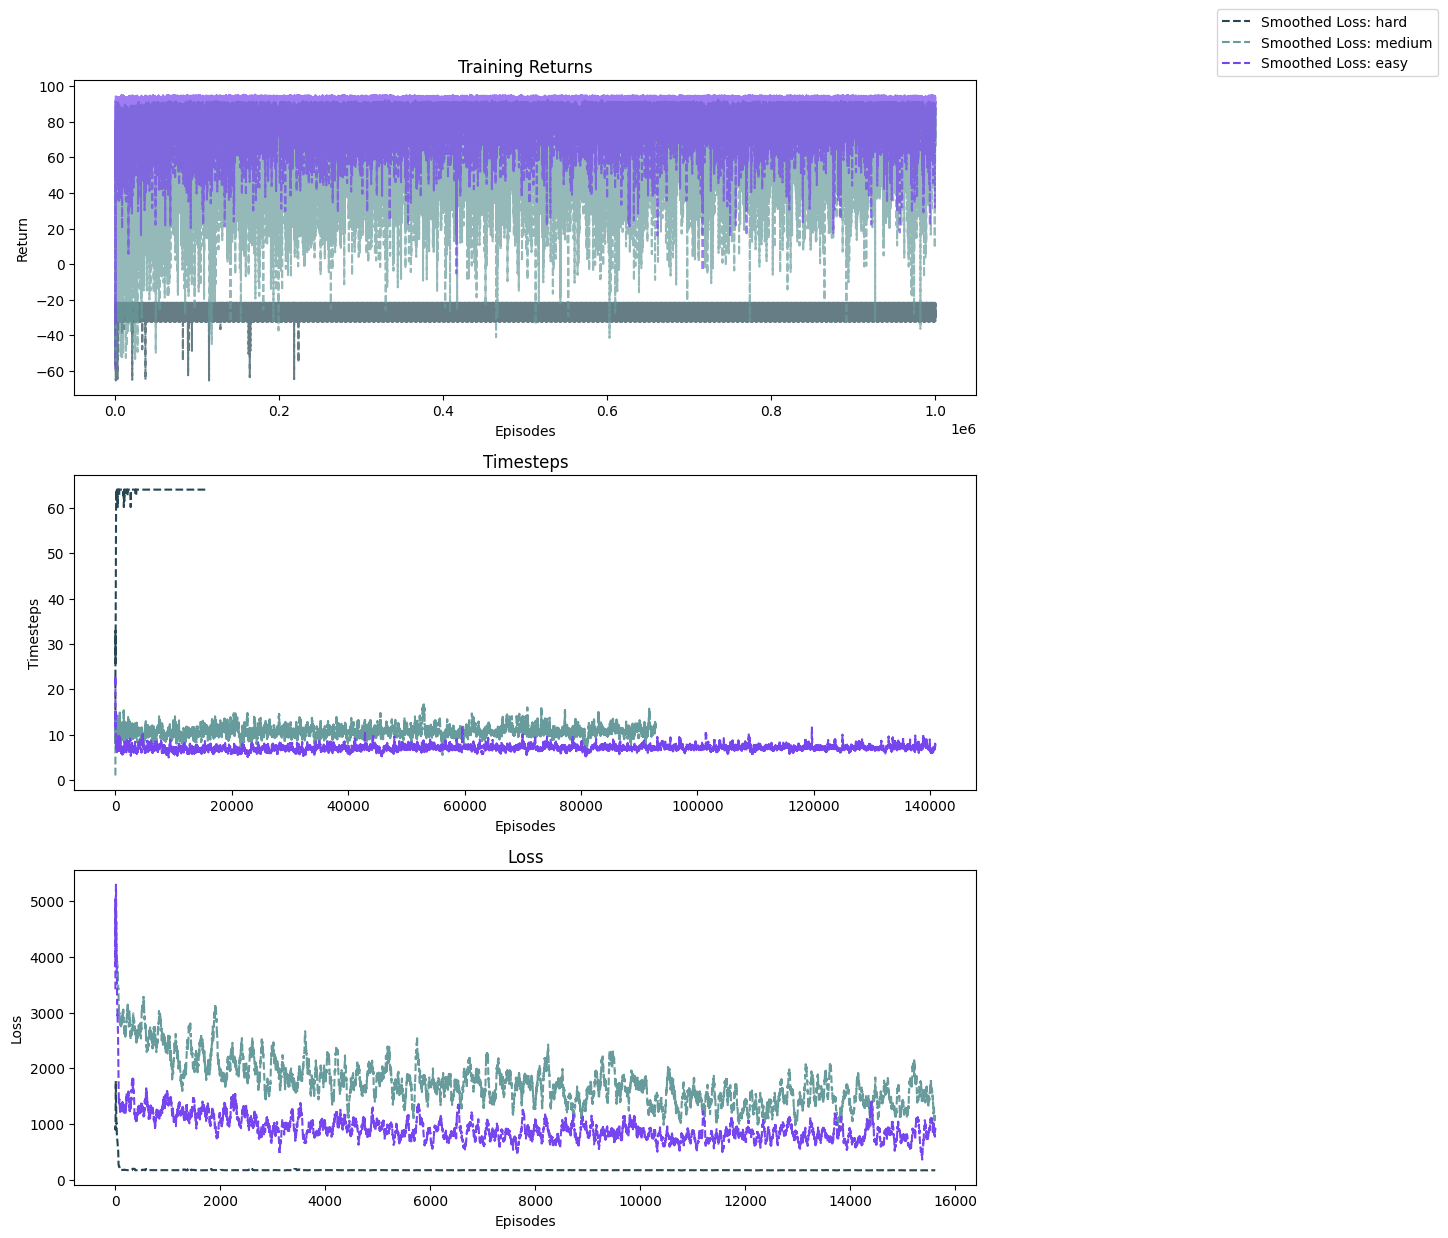

In [18]:
agent.plot_multiple_training_result(all_training_results, ["hard", "medium", "easy"]) # , "hard: clip 0.4"